                                            Домашнє завдання N 2

                                    Частина перша: Знайомство з Pandas.

In [29]:
# imports
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.__version__, np.__version__

('2.1.4', '1.26.3')

In [2]:
# Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

match='Коефіцієнт народжуваності в регіонах України'

table = pd.read_html('https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8',thousands="",
                          decimal=",",
                          match = match,
                    )

table

[               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
 0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
 1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
 2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
 3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
 4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
 5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
 6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
 7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
 8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
 9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
 10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
 11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
 12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
 13   

In [3]:
# Вивести перші рядки таблиці за допомогою методу head
birthday_data = pd.DataFrame(table[0])
birthday_data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [4]:
# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

shape = birthday_data.shape

print(f"rows - {shape[0]}, columns - {shape[1]} ")

rows - 28, columns - 9 


In [5]:
# Замініть у таблиці значення "—" на значення NaN

birthday_data.replace("—", np.nan, inplace=True)

birthday_data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


In [6]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes

column_types = birthday_data.dtypes

column_types

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [7]:
# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

birthday_data['2014'] = pd.to_numeric(birthday_data['2014'], errors='coerce')
birthday_data['2019'] = pd.to_numeric(birthday_data['2019'], errors='coerce')

column_types = birthday_data.dtypes

column_types

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [8]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

missing_rate = birthday_data.isnull().sum() / len(birthday_data)

missing_rate

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64

In [9]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці

last_row_index = birthday_data.index[-1]

birthday_data = birthday_data.drop(last_row_index)

birthday_data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [10]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

birthday_data.iloc[:, 1:] = birthday_data.iloc[:, 1:].fillna(birthday_data.iloc[:, 1:].mean()).round(1)

birthday_data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.1,8.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,8.0
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [11]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

average_birth_rate_2019 = birthday_data["2019"].mean()

regions_above_average_2019 = birthday_data[birthday_data["2019"] > average_birth_rate_2019]["Регіон"]

regions_above_average_2019

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object

In [12]:
# У якому регіоні була найвища народжуваність у 2014 році?

region_max_birth_2014 = birthday_data[birthday_data["2014"] == birthday_data["2014"].max()]["Регіон"]

region_max_birth_2014

16    Рівненська
Name: Регіон, dtype: object

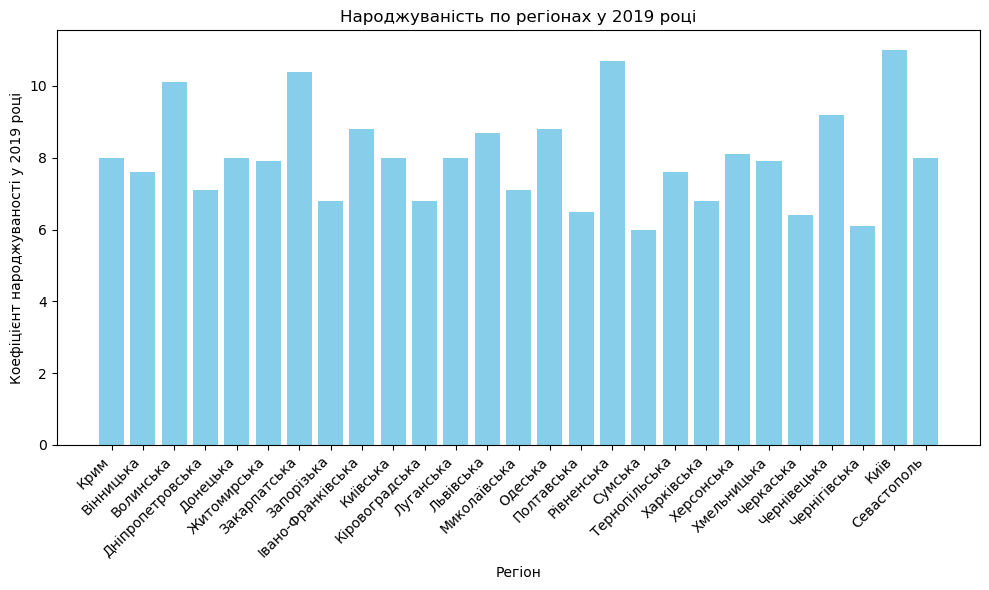

In [13]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

plt.figure(figsize=(10,  6))
plt.bar(birthday_data["Регіон"], birthday_data["2019"], color="skyblue")
plt.xlabel("Регіон")
plt.ylabel("Коефіцієнт народжуваності у 2019 році")
plt.title("Народжуваність по регіонах у 2019 році")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

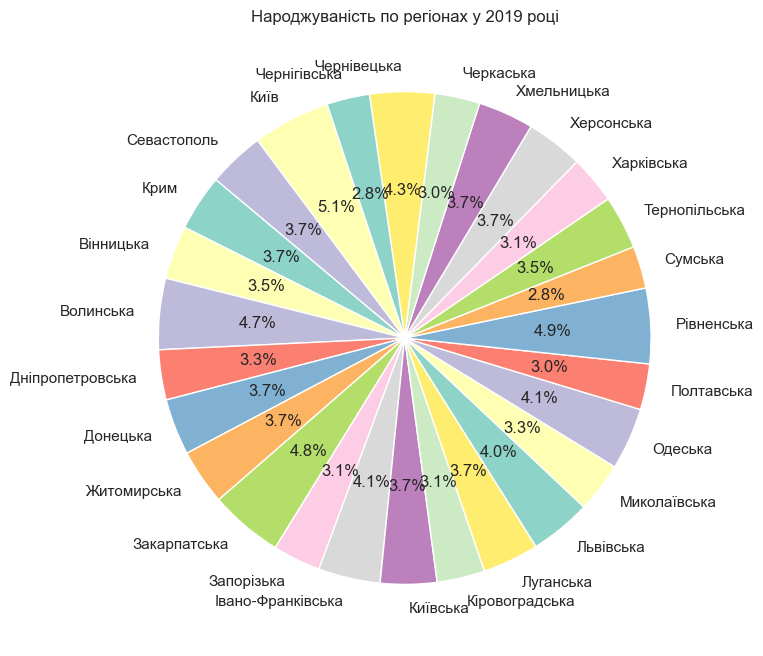

In [38]:
# Кругова діаграма коефіцієнтів народжуваності по регіонам у 2019 році

plt.figure(figsize=(10, 8))
plt.pie(birthday_data['2019'], labels=birthday_data['Регіон'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Народжуваність по регіонах у 2019 році')
plt.xticks(rotation=45, ha="right")

plt.show()

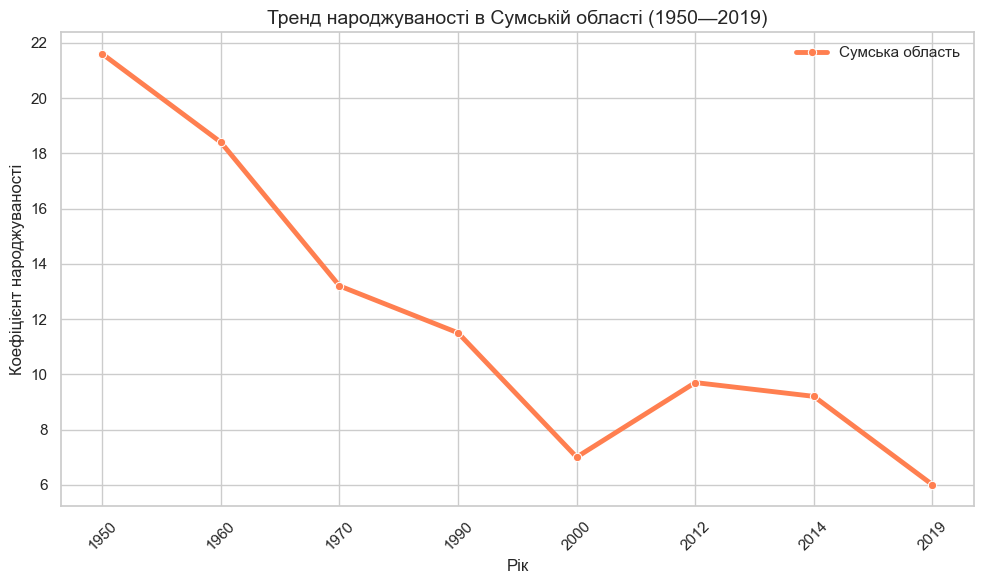

In [39]:
# Лінійний графік для Сумської області 

sumy_data = birthday_data[birthday_data['Регіон'] == 'Сумська'].iloc[:, 1:].T
sumy_data.columns = ['Народжуваність']
sumy_data.index.name = 'Рік'
sumy_data.reset_index(inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Рік', y='Народжуваність', data=sumy_data, marker='o', color="coral", linewidth=3.5)
plt.title('Тренд народжуваності в Сумській області (1950—2019)', fontsize=14)
plt.xlabel('Рік', fontsize=12)
plt.ylabel('Коефіцієнт народжуваності', fontsize=12)
plt.legend(labels=['Сумська область'], frameon=False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

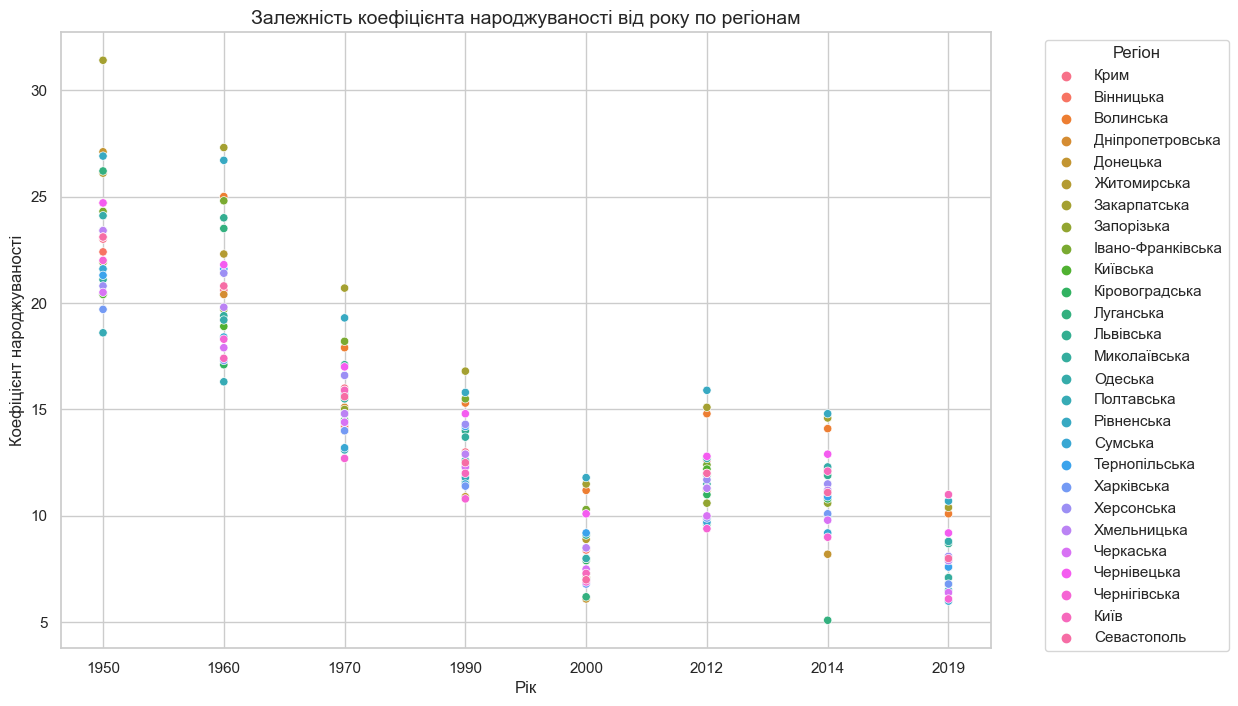

In [44]:
# Графік розсіювання народжуваності по рокам

melted_data = birthday_data.melt(id_vars="Регіон", var_name="Рік", value_name="Народжуваність")

plt.figure(figsize=(12, 8))
sns.scatterplot(data=melted_data, x='Рік', y='Народжуваність', hue='Регіон')
plt.title('Залежність коефіцієнта народжуваності від року по регіонам', fontsize=14)
plt.xlabel('Рік', fontsize=12)
plt.ylabel('Коефіцієнт народжуваності', fontsize=12)
plt.legend(title='Регіон', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
